In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [2]:
import numpy as np
import pandas as pd

**Importing the dataset**

In [4]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


**Splitting the dataset into the Training set and Test set**

In [5]:
from sklearn.preprocessing import LabelEncoder
model = LabelEncoder()

model.fit(df['Gender'])
df['Gender'] = model.transform(df['Gender'])

In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [7]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

**Feature Scaling**

In [8]:
from sklearn.preprocessing import StandardScaler
ss_obj = StandardScaler()
X_train = ss_obj.fit_transform(X_train)
X_test = ss_obj.fit_transform(X_test)

**Fitting Decision Tree Classification to the Training set**

In [21]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=2, random_state=0)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

**Predicting the Test set results**

In [22]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_test)*100)
print(accuracy_score(y_train,y_pred_train)*100)

94.16666666666667
90.71428571428571


**Making the Confusion Matrix**

In [23]:
from sklearn.metrics import confusion_matrix
con_mat_test = confusion_matrix(y_pred_test,y_test)
con_mat_train = confusion_matrix(y_pred_train,y_train)
print(con_mat_test)
print(con_mat_train)

[[67  1]
 [ 6 46]]
[[165   7]
 [ 19  89]]


**Visualising the Training set results**

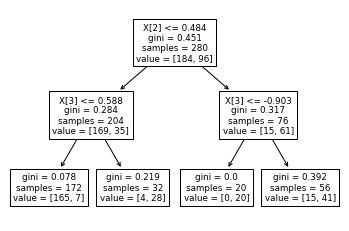

In [24]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(model)
plt.show()

**Visualising the Test set results**

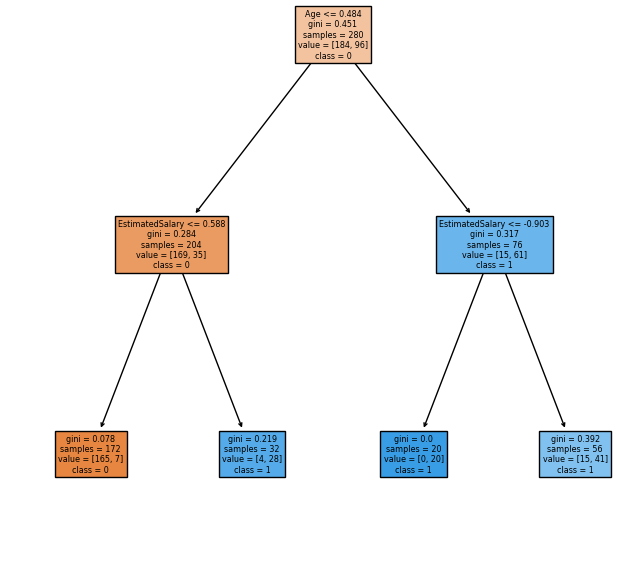

In [35]:
fn=['User ID','Gender','Age','EstimatedSalary']
cn=['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=100)
tree.plot_tree(model,feature_names = fn,class_names=cn,filled = True);
#fig.savefig('imagename.png')